In [332]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


# machine learning library

In [333]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier


In [334]:
df = pd.read_csv('/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Rata-rata gaji berdasarkan jurusan

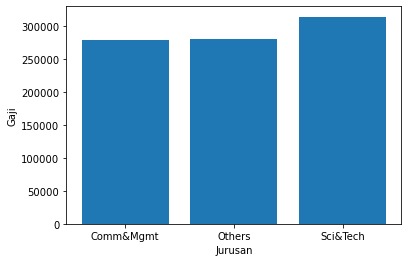

In [335]:
#pakai mean & grouping, tipe : bar

gaji = df.groupby(['degree_t'])['salary'].mean()

plt.bar(gaji.index, gaji)
plt.xlabel("Jurusan")
plt.ylabel('Gaji')

plt.show()

# Jumlah murid yang ketrima kerja berdasarkan gender

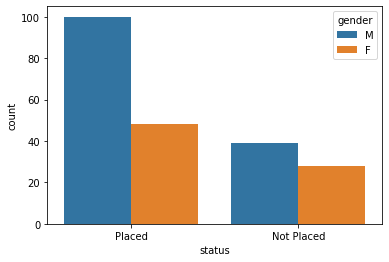

In [336]:
sns.countplot(df['status'], hue=df['gender'])

# Jumlah mahasiswa yang memiliki tipe spesialisasi tertentu MBA berdasarkan degree nya

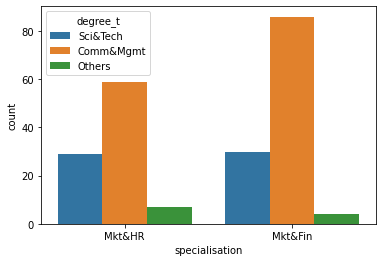

In [337]:
sns.countplot(df['specialisation'], hue=df['degree_t'])

# Jurusan yang diambil mahasiswa berdasarkan spesialisasi pendidikan secondary mereka

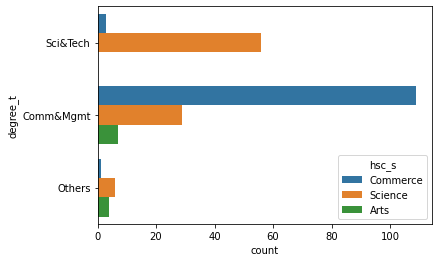

In [338]:
sns.countplot(y="degree_t", hue="hsc_s", data=df)

# Jumlah mahasiswa yang dipecah berdasarkan jurusan yang diambil

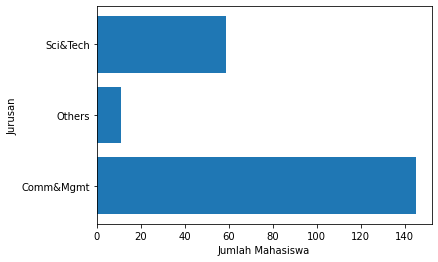

In [339]:
#barh + count
mhs_jurusan = df.groupby(['degree_t'])['gender'].count()

plt.barh(mhs_jurusan.index, mhs_jurusan)

plt.ylabel("Jurusan")
plt.xlabel('Jumlah Mahasiswa')

plt.show()

# Nilai MBA_P berdasarkan nomer seri (sesuai gender)

gender
F    AxesSubplot(0.125,0.125;0.775x0.755)
M    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

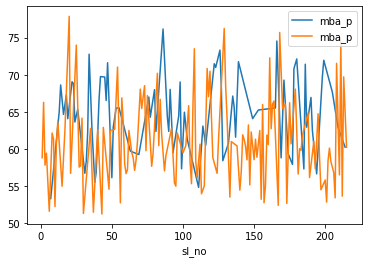

In [340]:
fig, ax = plt.subplots()
df.groupby(['gender']).plot(x = 'sl_no', y = 'mba_p', ax=ax)

# Grafik besar gaji yang didapat berdasarkan persentase degree

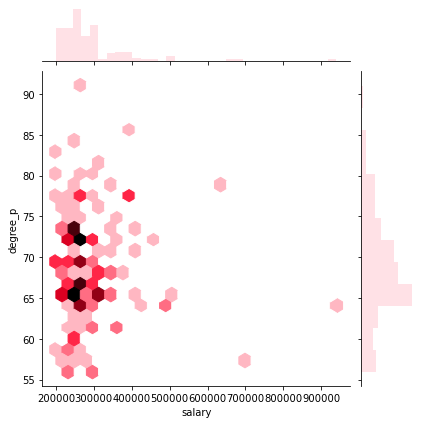

In [341]:
#pakai joint plot hex
sns.jointplot("salary", "degree_p", data=df, kind='hex', color='lightpink')

# Grafik line hasil tes kemampuan kerja yang diurutkan berdasarkan nomer seri murid

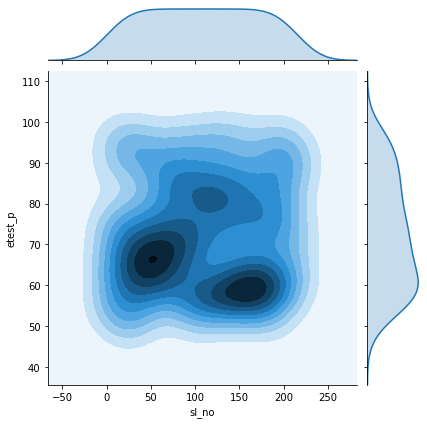

In [342]:
# pakai joint plot kde
sns.jointplot(x="sl_no", y="etest_p", data=df, kind="kde")

# Perbandingan besar gaji yang didapat berdasarkan nilai etest dengan nilai mba_p

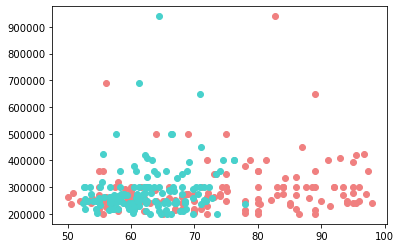

In [343]:
fig, ax = plt.subplots()

ax.scatter(df['etest_p'], df['salary'], color='lightcoral')
ax.scatter(df['mba_p'], df['salary'], color='mediumturquoise')

# Siapin data buat machine learning :v

In [344]:
y = df['status']
X = df.copy()

In [345]:
gender = {'M': 1,'F': 2}  
hsc_b = {'Others': 1,'Central': 2}
hsc_s = {'Commerce': 1,'Science': 2, 'Arts': 3} 
ssc_b = {'Others': 1,'Central': 2}
degree_t = {'Sci&Tech':1,'Comm&Mgmt':2,'Others':1}
workex = {'No':1,'Yes':2}
specialisation = {'Mkt&HR':1,'Mkt&Fin':2}
status = {'Placed': 1,'Not Placed': 0}

X['gender'] = [gender[item] for item in X.gender]
X['hsc_b'] = [hsc_b[item] for item in X.hsc_b] 
X['hsc_s'] = [hsc_s[item] for item in X.hsc_s]
X['ssc_b'] = [ssc_b[item] for item in X.ssc_b] 
X['degree_t'] = [degree_t[item] for item in X.degree_t] 
X['workex'] = [workex[item] for item in X.workex] 
X['specialisation'] = [specialisation[item] for item in X.specialisation] 
X['status'] = [status[item] for item in X.status]

In [346]:
X.drop(['sl_no','salary'],axis=1,inplace=True)


In [347]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int64  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int64  
 5   hsc_s           215 non-null    int64  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int64  
 8   workex          215 non-null    int64  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int64  
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 22.0 KB


# Pemisahan file csv utama ke train dan test file

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.16, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180, 13), (35, 13), (180,), (35,))

# Akurasi persentase Support Vector Machines

In [349]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

85.0

# Akurasi persentase K-Nearest Neighbors

In [350]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

90.56

# Akurasi persentase Stochastic Gradient Descent

In [351]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

76.11

# Akurasi persentase Gaussian Process Classifier

In [352]:
gpc = GaussianProcessClassifier()
gpc.fit(X_train, y_train)
y_pred = gpc.predict(X_test)
acc_gpc = round(gau.score(X_test, y_test)*100, 2)
print(acc_gpc)

68.57


# Tabel akurasi persentase beberapa tipe machine learning

In [353]:
models = pd.DataFrame({
    'Model Name': ['Support Vector Machines', 'KNN', 'Stochastic Gradient Decent', 'Gaussian Process Classifier'],
    'Score': [acc_svc, acc_knn, acc_sgd, acc_gpc]})
models.sort_values(by='Score', ascending=False)

,Model Name,Score
1,KNN,90.56
0,Support Vector Machines,85.00
2,Stochastic Gradient Decent,76.11
3,Gaussian Process Classifier,68.57
